In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Problem Statement
## <b>In this problem you have to predict the age of a person with the help of their image

## Importing essential libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import sklearn
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
import tensorflow as tf
from tensorflow import keras
import cv2

In [5]:
#Import modules to make a Model
from tensorflow.keras.models import Sequential, Model
from keras.layers import Flatten, Dense
from keras.activations import  relu

from tensorflow.keras.optimizers import SGD, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [6]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array

## File Handling

Train_Images

In [7]:
train_path = "/kaggle/input/overnight-hackathon/Train_Images/Train_Images/"
train_images_path = os.listdir(train_path)
print("Total train images are: ",len(train_images_path))


Total train images are:  29497


In [8]:
train_images_path[:2]

['IMG_24111_FI_F_15.png', 'IMG_8632_HI_F_18.jpg']

In [9]:
train_images_FI = []
train_images_HI = []
ages_FI = []
ages_HI = []
#genders_FI = []
#genders_HI = []
path=train_path
files=train_images_path
for file in files:
    if "FI" in file:
        image = cv2.imread(path+file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,dsize=(100,100))
        train_images_FI.append(image)
        split_var = file.split('_')
        ages_FI.append(split_var[4])
        
    if "HI" in file:
        image = cv2.imread(path+file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,dsize=(100,100))
        train_images_HI.append(image)
        split_var = file.split('_')
        ages_HI.append(split_var[4])
        

In [10]:
type(train_images_FI), type(ages_FI)

(list, list)

In [11]:
age_FI=[]
age_HI=[]
for i in ages_FI:
    age_FI.append(int(i.split(".")[0]))
for i in ages_HI:
    age_HI.append(int(i.split(".")[0]))

In [12]:
len(age_FI),len(age_HI)

(13288, 16209)

In [13]:
age_FI = np.array(age_FI)
age_HI = np.array(age_HI)

In [14]:
print(age_FI.size)
print(age_HI.size)

13288
16209


In [15]:
train_images_FI_array = np.array(train_images_FI)
train_images_HI_array = np.array(train_images_HI)

In [16]:
train_images_FI_array.shape, train_images_HI_array.shape

((13288, 100, 100, 3), (16209, 100, 100, 3))

Test_Images

In [17]:
test_path = "/kaggle/input/overnight-hackathon/Test_Image/Test_Image/"
test_images_path = os.listdir(test_path)
print("Total train images are: ",len(test_images_path))

Total train images are:  12642


In [18]:
test_images_path[:2]

['IMG_2486_HI_F.jpg', 'IMG_3764_FI_F.jpg']

In [19]:
test_images_FI = []
test_images_HI = []
path=test_path
files=test_images_path
for file in files:
    if "FI" in file:
        image = cv2.imread(path+file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,dsize=(100,100))
        test_images_FI.append(image)
    if "HI" in file:
        image = cv2.imread(path+file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,dsize=(100,100))
        test_images_HI.append(image)

In [20]:
test_images_FI_array = np.array(test_images_FI)
test_images_HI_array = np.array(test_images_HI)

In [21]:
test_images_FI_array.shape, test_images_HI_array.shape

((5683, 100, 100, 3), (6959, 100, 100, 3))

In [22]:
test_images_FI_array[0].shape, test_images_FI_array[1].shape

((100, 100, 3), (100, 100, 3))

Load Test CSV Data

In [23]:
test_csv_df= pd.read_csv("/kaggle/input/overnight-hackathon/Test_Data.csv")

In [24]:
test_csv_df.head()

,img_file
0,IMG_10000_HI_M.jpg
1,IMG_10001_FI_F.jpg
2,IMG_10002_FI_F.jpg
3,IMG_10003_FI_F.jpg
4,IMG_10004_FI_M.jpeg


In [25]:
#Shape of test DataFrame
test_csv_df.shape

(12642, 1)

View few images

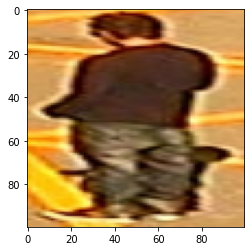

In [26]:
plt.imshow(train_images_FI_array[5])

In [27]:
X_train_FI, X_val_FI, y_train_FI, y_val_FI = train_test_split(train_images_FI_array, age_FI, test_size=0.2, random_state=33)

In [28]:
X_train_HI, X_val_HI, y_train_HI, y_val_HI = train_test_split(train_images_HI_array, age_HI, test_size=0.2, random_state=33)

Data Augmentation

In [29]:
datagen_HI = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        fill_mode='nearest')

datagen_HI.fit(X_train_HI)

val_datagen_HI = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen_HI.fit(X_val_HI)

In [30]:
datagen_FI = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        fill_mode='nearest')

datagen_FI.fit(X_train_FI)

val_datagen_FI = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen_FI.fit(X_val_FI)

## Building Model

## Model for HI DataSet

In [31]:
resnet_model_HI = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(100,100,3),
                   pooling='avg',
                   weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

resnet_model_HI.add(pretrained_model)
resnet_model_HI.add(Flatten())
resnet_model_HI.add(Dense(256, activation='relu'))
resnet_model_HI.add(Dense(1))

2022-11-13 00:14:01.928086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 00:14:01.929055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 00:14:02.105348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 00:14:02.106881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 00:14:02.108112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

94781440/94765736 [==============================] - 1s 0us/step


In [32]:
resnet_model_HI.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 24,059,393
Non-trainable params: 53,120
_________________________________________________________________


In [33]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [34]:
from tensorflow.keras.optimizers import RMSprop

In [35]:
resnet_model_HI.compile(optimizer=RMSprop(),loss='mean_squared_error',metrics=[r2_keras])

In [36]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [37]:
model_history_HI = resnet_model_HI.fit_generator(datagen_HI.flow(X_train_HI, y_train_HI, batch_size=32), 
                    #samples_per_epoch=len(X_train),  
                    epochs=40, 
                    validation_data=val_datagen_HI.flow(X_val_HI, y_val_HI, batch_size=32),
                    #nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-13 00:16:06.217259: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-11-13 00:16:17.614002: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


406/406 [==============================] - 83s 153ms/step - loss: 183.6228 - r2_keras: 0.4067 - val_loss: 168.9820 - val_r2_keras: 0.4504
Epoch 2/40
406/406 [==============================] - 61s 151ms/step - loss: 114.8694 - r2_keras: 0.6266 - val_loss: 274.3865 - val_r2_keras: 0.0977
Epoch 3/40
406/406 [==============================] - 61s 150ms/step - loss: 97.3627 - r2_keras: 0.6804 - val_loss: 113.5285 - val_r2_keras: 0.6299
Epoch 4/40
406/406 [==============================] - 62s 151ms/step - loss: 86.0429 - r2_keras: 0.7209 - val_loss: 142.2055 - val_r2_keras: 0.5244
Epoch 5/40
406/406 [==============================] - 61s 149ms/step - loss: 81.2209 - r2_keras: 0.7346 - val_loss: 267.9552 - val_r2_keras: 0.0959
Epoch 6/40
406/406 [==============================] - 62s 152ms/step - loss: 76.9029 - r2_keras: 0.7503 - val_loss: 155.8673 - val_r2_keras: 0.4949
Epoch 7/40
406/406 [==============================] - 61s 151ms/step - loss: 73.5556 - r2_keras: 0.7588 - val_loss: 83.27

In [38]:
print(model_history_HI.history.keys())

dict_keys(['loss', 'r2_keras', 'val_loss', 'val_r2_keras'])


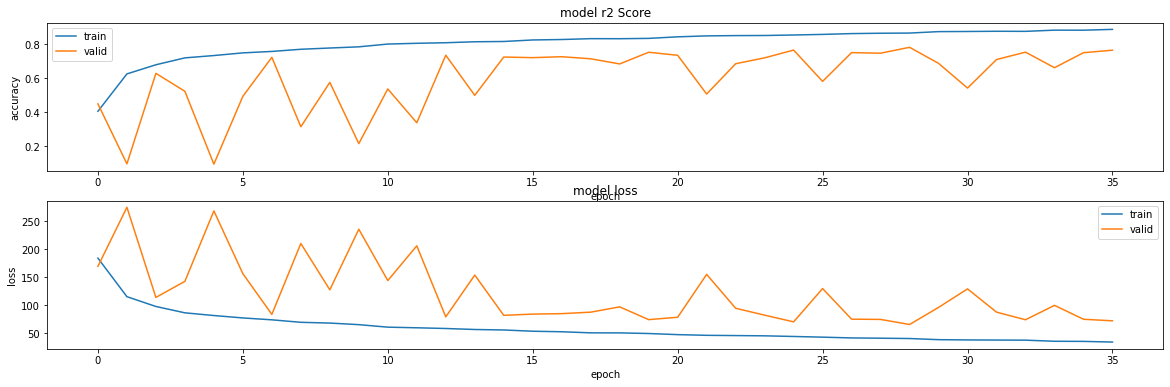

In [39]:
plt.figure(1, figsize = (20,6)) 
    
plt.subplot(211)  
plt.plot(model_history_HI.history['r2_keras'])  
plt.plot(model_history_HI.history['val_r2_keras'])  
plt.title('model r2 Score')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(212)  
plt.plot(model_history_HI.history['loss'])  
plt.plot(model_history_HI.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [41]:
resnet_model_HI.save("HI_model_resnet")

2022-11-13 00:58:30.062200: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Model for "FI" Dataset

In [42]:
resnet_model_FI = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(100,100,3),
                   pooling='avg',
                   weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

resnet_model_FI.add(pretrained_model)
resnet_model_FI.add(Flatten())
resnet_model_FI.add(Dense(256, activation='relu'))
resnet_model_FI.add(Dense(1))

In [43]:
resnet_model_FI.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 24,059,393
Non-trainable params: 53,120
_________________________________________________________________


In [44]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [47]:
resnet_model_FI.compile(optimizer=RMSprop(),loss='mean_squared_error',metrics=[r2_keras])

In [50]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [51]:
model_history_FI = resnet_model_FI.fit_generator(datagen_FI.flow(X_train_FI, y_train_FI, batch_size=32), 
                    #samples_per_epoch=len(X_train),  
                    epochs=23, 
                    validation_data=val_datagen_FI.flow(X_val_FI, y_val_FI, batch_size=32),
                    #nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/23
333/333 [==============================] - 50s 151ms/step - loss: 102.4616 - r2_keras: 0.4676 - val_loss: 139.7815 - val_r2_keras: -0.0383
Epoch 2/23
333/333 [==============================] - 50s 150ms/step - loss: 97.5902 - r2_keras: 0.4983 - val_loss: 123.7108 - val_r2_keras: 0.2423
Epoch 3/23
333/333 [==============================] - 50s 151ms/step - loss: 93.2976 - r2_keras: 0.5197 - val_loss: 103.2822 - val_r2_keras: 0.4405
Epoch 4/23
333/333 [==============================] - 49s 148ms/step - loss: 91.0742 - r2_keras: 0.5230 - val_loss: 123.7487 - val_r2_keras: 0.3422
Epoch 5/23
333/333 [==============================] - 50s 150ms/step - loss: 89.6550 - r2_keras: 0.5363 - val_loss: 119.3672 - val_r2_keras: 0.3594
Epoch 6/23
333/333 [==============================] - 49s 148ms/step - loss: 85.5255 - r2_keras: 0.5498 - val_loss: 113.5459 - val_r2_keras: 0.3684
Epoch 7/23
333/333 [==============================] - 50s 151ms/step - loss: 82.3814 - r2_keras: 0.5695 - val_

In [52]:
resnet_model_FI.save("FI_model_resnet")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


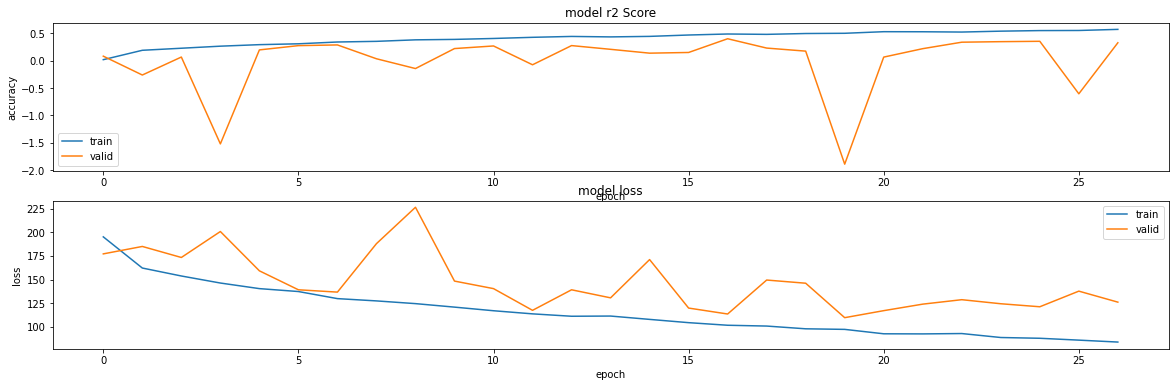

In [60]:
plt.figure(1, figsize = (20,6)) 
    
plt.subplot(211)  
plt.plot(model_history_FI.history['r2_keras'])  
plt.plot(model_history_FI.history['val_r2_keras'])  
plt.title('model r2 Score')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(212)  
plt.plot(model_history_FI.history['loss'][1:])  
plt.plot(model_history_FI.history['val_loss'][1:])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

## Overall Model

In [13]:
train_images=[]
ages=[]
path=train_path
files=train_images_path
for file in files:
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,dsize=(80,80))
    train_images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[4].split(".")[0]))
        
   

In [14]:
ages = np.array(ages)
train_images = np.array(train_images)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train_images, ages, test_size=0.2, random_state=30)

In [16]:
datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

val_datagen.fit(X_val)

In [17]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(80,80,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(1))

2022-11-12 23:33:35.837123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 23:33:35.838564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 23:33:35.984129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 23:33:35.984981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 23:33:35.985774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [18]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 25,751,553
Trainable params: 2,163,841
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
from tensorflow.keras.optimizers import RMSprop
resnet_model.compile(optimizer=RMSprop(),loss='mean_squared_error',metrics=[r2_keras])

In [22]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [23]:
model_history = resnet_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    #samples_per_epoch=len(X_train),  
                    epochs=30, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                    #nb_val_samples=len(X_val),
                    verbose=1,
                    callbacks=[early_stop])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-12 23:34:23.580806: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-12 23:34:28.128511: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


738/738 [==============================] - 73s 83ms/step - loss: 213.7560 - r2_keras: 0.1808 - val_loss: 174.4533 - val_r2_keras: 0.3358
Epoch 2/30
738/738 [==============================] - 60s 81ms/step - loss: 178.3682 - r2_keras: 0.3133 - val_loss: 168.9406 - val_r2_keras: 0.3531
Epoch 3/30
738/738 [==============================] - 59s 80ms/step - loss: 168.4540 - r2_keras: 0.3495 - val_loss: 215.8083 - val_r2_keras: 0.1479
Epoch 4/30
738/738 [==============================] - 60s 81ms/step - loss: 162.6237 - r2_keras: 0.3809 - val_loss: 157.6861 - val_r2_keras: 0.3906
Epoch 5/30
738/738 [==============================] - 59s 80ms/step - loss: 157.0223 - r2_keras: 0.3962 - val_loss: 153.5205 - val_r2_keras: 0.4100
Epoch 6/30
738/738 [==============================] - 59s 80ms/step - loss: 155.5367 - r2_keras: 0.4030 - val_loss: 154.7844 - val_r2_keras: 0.4077
Epoch 7/30
738/738 [==============================] - 69s 93ms/step - loss: 152.4088 - r2_keras: 0.4160 - val_loss: 151.813

KeyboardInterrupt: 

In [24]:
model_history.history.keys()

NameError: name 'model_history' is not defined

## Test Data

In [ ]:
# test_images_FI_array = np.array(test_images_FI)
# test_images_HI_array = np.array(test_images_HI)
    

In [ ]:
test_images_FI_array.shape, test_images_HI_array.shape

In [ ]:
age_FI_pred = resnet_model_FI.predict(test_images_FI_array)
age_HI_pred = resnet_model_HI.predict(test_images_HI_array)

In [ ]:
test_csv_df.head()

In [ ]:
df_HI= df[df['img_file'].str.contains('HI')]
df_FI= df[df['img_file'].str.contains('FI')]

In [ ]:
df_HI.head()

In [ ]:
df_FI.head()

In [ ]:
df_HI['age']= age_HI_pred
df_FI['age']= age_FI_pred

In [ ]:
pred_age = pd.concat([df_HI, df_FI])

In [ ]:
pred_age=pred_age.sort_values(by="img_file")